In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy
from astropy.io import fits
import sys

In [48]:
filename='matchstars_fixed'
valsin=np.loadtxt(filename,dtype=float,delimiter=',',skiprows=1)
colnames=np.loadtxt(filename,dtype=str,delimiter=',',max_rows=1)
print(len(colnames))


i=0
fulldataset={}
for i in range(len(colnames)):
    fulldataset.update({colnames[i]:valsin[:,i]})

print(fulldataset.keys())

#make easy region files for ds9 check
#i=0
#for i in range(len(valsin[:,12])):
#    print('circle(',valsin[i,1],',',valsin[i,2],',','7.0"',')')

17
dict_keys(['ra_1', 'dec_1', 'fluxaper', 'flux_err', 'fwhm_im', 'flags_1', 'class_star_1', 'ra_2', 'dec_2', 'faper_f160w', 'eaper_f160w', 'star_flag', 'class_star_2', 'flux_radius_2', 'fwhm_image', 'flags_2', 'Separation'])


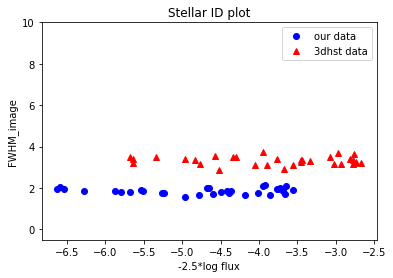

In [49]:
#column 3 is 'FLUX_APER' produced by running SE on the (trimmed) F160W band image of IRC0218 from Gabe's database
#the aperture was set to 7.0 pixels, since the pixel scale is 0.1
#logflux isn't quite magnitude but it should be proportional to it
flux=fulldataset['fluxaper']
flux_err=fulldataset['flux_err']
flux_3dhst=fulldataset['faper_f160w']
flux_err_3dhst=fulldataset['eaper_f160w']
logflux=-2.5*np.log10(flux)
log3dhst=-2.5*np.log10(flux_3dhst)

fwhmim=fulldataset['fwhm_im']
fwhm3dhst=fulldataset['fwhm_image']
#column 5 is the 'FWHM_IMAGE' produced running SE on the (trimmed) F160W band image of IRC0218 from Gabe's database

plt.figure()
plt.title('Stellar ID plot')
plt.xlabel('-2.5*log flux')
plt.ylabel('FWHM_image')
plt.plot(logflux,fwhmim,'bo',label='our data')
#column 12 is the f_aperf160w value from the 3DHST catalog. This is the flux in the 0.7 arcsec aperture
#column 23 is the 'FWHM_IMAGE' from the 3DHST catalog.
plt.plot(log3dhst,fwhm3dhst,'r^',label='3dhst data')
plt.ylim(-0.5,10)
plt.legend(loc='upper right')
plt.show()

Looking better!

Now, onto the math. set phot parameters. ABMAG = -2.5xlogFv -48.6; Fv needs to be ergs/cm2/s/Hz; easy, using photnu instead of photlambda. for the 3dhst set, magAB = 25.0-2.5xlog10(flux), no conversion needed

In [50]:
photfnu=1.518757E-07
photflam=1.9275602E-20
photplam=15369.176
#assuming, since photflam is in coordinates of erg/cm2/A/electron, 
#that photfnu is erg/cm2/Hz/electron

Update 16 June 2020: Greg suggests I am going about this from the wrong direction; instead of turning e/s into flux to get mag, I should turn e/s into mag to get flux
old version below
so as described above, and in the WFC3 handbook, and as we talked about in the latex documents I made
ABmag= -2.5 x log(Fv) -48.6, and Fv needs to be in units of ergs/cm2/s/Hz
abmag=(-2.5 x np.log10(photfnu times valsin[:,3]))-48.6
abmag_3dhst=-2.5xnp.log10(valsin[:,12])+25.0
magAB = 25.0-2.5xlog10(flux)



In [51]:
#new version here
abmag_zpt= -2.5*np.log10(photflam) -21.10 -5.0*np.log10(photplam) +18.692
abmag=-2.5*np.log10(flux) +abmag_zpt
#that's our version above, compared to the vals from 3dhst below
abmag_3dhst= -2.5*np.log10(flux_3dhst)+25.0

#hmm, error propagation

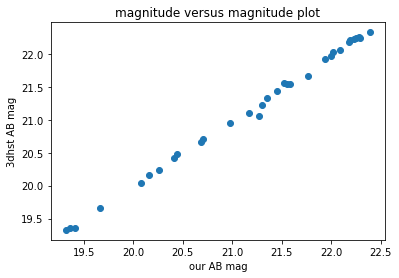

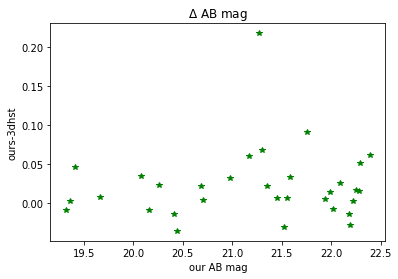

In [53]:
plt.plot(abmag,abmag_3dhst,'o')
plt.title('magnitude versus magnitude plot')
plt.xlabel('our AB mag')
plt.ylabel('3dhst AB mag')
plt.show()
plt.plot(abmag,abmag-abmag_3dhst,'g*')
plt.title(r'$\Delta$ AB mag')
plt.xlabel('our AB mag')
plt.ylabel('ours-3dhst')
plt.show()

ahhhh that looks a lot better! at least the upper one does. even if there's 1 star that's odd, it's only 0.25 mag difference vs 0.05 mag difference. ie, not 5 mags of difference.